**Name:** Bala Guga Gopal S

**Script Name:** Encoder-Decoder Style Transfer model (Image to Image) / Image Denoising

**Script Description:** Encoder-Decoder Style Transfer model (Image to Image) / Image Denoising

# Image denoising using 
1. MNIST
2. Dirty Documnets

# Mnist data 

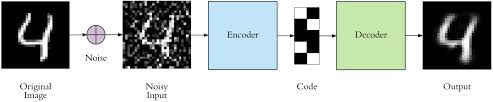

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import tensorflow as tf
import keras 
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D, UpSampling2D,Dropout
!pip install visualkeras
import visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 992 kB 14.1 MB/s 


# Dataset Preprocessing
we will be using the MNIST dataset which is mainly for classification and consists of 60000 images of size 28×28 of 10 digits. More information about the dataset can be read from this link- https://keras.io/api/datasets/mnist/.

In [2]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
# to get the shape of the data 
print("x_train shape:",x_train.shape)
print("x_test shape", x_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28)
x_test shape (10000, 28, 28)


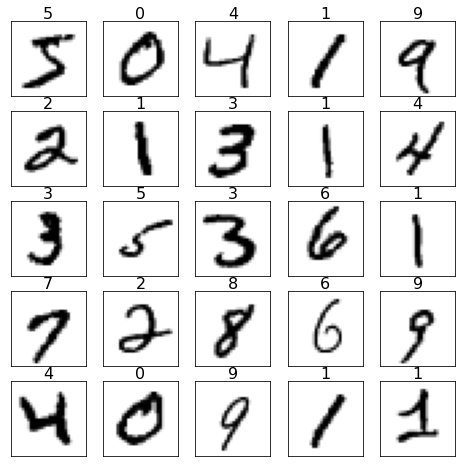

In [3]:
plt.figure(figsize = (8,8))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.title(str(y_train[i]),fontsize = 16, color = 'black', pad = 2)
  plt.imshow(x_train[i], cmap = plt.cm.binary )
  plt.xticks([])
  plt.yticks([])

plt.show()

In [5]:
val_images = x_test[:9000]
test_images = x_test[9000:]

In [6]:
val_images = val_images.astype('float32') / 255.0
val_images = np.reshape(val_images,(val_images.shape[0],28,28,1))

test_images = test_images.astype('float32') / 255.0
test_images = np.reshape(test_images,(test_images.shape[0],28,28,1))

train_images = x_train.astype("float32") / 255.0
train_images = np.reshape(train_images, (train_images.shape[0],28,28,1))

# Adding noise 

Here we are adding random numbers the our images so that our image look noisy, and we can feed them as input to our network along with non noisy image as target so that our network learns to denoise image

In [7]:
factor = 0.39
train_noisy_images = train_images + factor * np.random.normal(loc = 0.0,scale = 1.0,size = train_images.shape)
val_noisy_images = val_images + factor * np.random.normal(loc = 0.0,scale = 1.0,size = val_images.shape)
test_noisy_images = test_images + factor * np.random.normal(loc = 0.0,scale = 1.0,size = test_images.shape)

# here maximum pixel value for our images may exceed 1 so we have to clip the images
train_noisy_images = np.clip(train_noisy_images,0.,1.)
val_noisy_images = np.clip(val_noisy_images,0.,1.)
test_noisy_images = np.clip(test_noisy_images,0.,1.)

# Visualizing images after adding noise

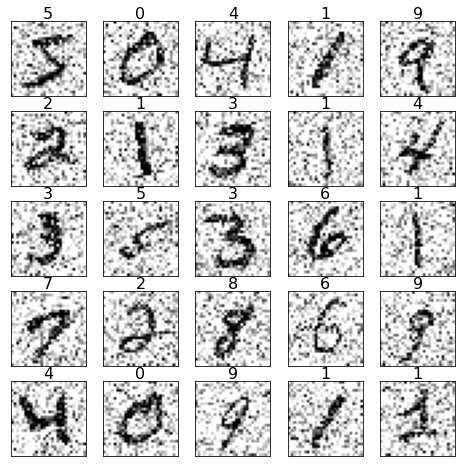

In [8]:
plt.figure(figsize = (8,8))

for i in range(25):      
      plt.subplot(5,5,i+1)
      plt.title(str(y_train[i]),fontsize = 16, color = 'black', pad = 2)
      plt.imshow(train_noisy_images[i].reshape(1,28,28)[0], cmap = plt.cm.binary )
      plt.xticks([])
      plt.yticks([])

plt.show()

In [9]:
model = Sequential()
# encoder network
model.add(Conv2D(filters = 128, kernel_size = (2,2), activation = 'relu', padding = 'same', input_shape = (28,28,1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(filters = 128, kernel_size = (2,2), activation = 'relu', padding = 'same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(filters = 256, kernel_size = (2,2),strides = (2,2), activation = 'relu', padding = 'same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(filters = 256, kernel_size = (2,2), activation = 'relu', padding = 'same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(filters = 512, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(filters = 512, kernel_size = (2,2),strides = (2,2), activation = 'relu', padding = 'same'))



# decoder network
model.add(Conv2D(filters = 512, kernel_size = (2,2), activation = 'relu', padding = 'same'))

model.add(tf.keras.layers.Conv2DTranspose(filters = 512, kernel_size = (2,2), strides = (2,2),activation = 'relu', padding = 'same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(filters = 256, kernel_size = (2,2), activation = 'relu', padding = 'same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(filters = 256, kernel_size = (2,2), activation = 'relu', padding = 'same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(filters = 128, kernel_size = (2,2), activation = 'relu', padding = 'same'))


model.add(tf.keras.layers.Conv2DTranspose(filters = 128, kernel_size = (2,2),strides = (2,2), activation = 'relu', padding = 'same'))
model.add(Conv2D(filters = 64, kernel_size = (2,2), activation = 'relu', padding = 'same'))
model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(filters = 1, kernel_size = (2,2), activation = 'relu', padding = 'same'))


# to get the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 128)       640       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 128)      512       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 128)       65664     
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 128)      512       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 256)       131328    
                                                                 
 batch_normalization_2 (Batc  (None, 14, 14, 256)      1

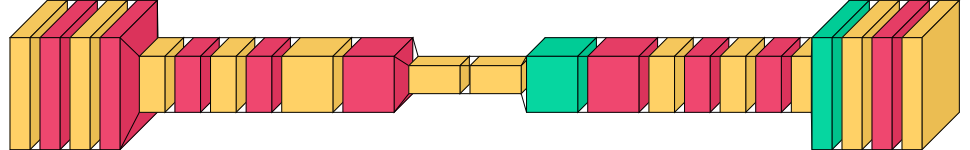

In [10]:
visualkeras.layered_view(model)

In [11]:
# Compile model

OPTIMIZER =  tf.keras.optimizers.Adam(learning_rate = 0.001)
LOSS = 'mean_squared_error'
model.compile(optimizer =OPTIMIZER, loss = LOSS, metrics = ['accuracy'])

In [14]:
# Fitting the model

EPOCHS = 5
BATCH_SIZE = 256
VALIDATION = (val_noisy_images, val_images)
history = model.fit(train_noisy_images, train_images,batch_size = BATCH_SIZE,epochs = EPOCHS, validation_data = VALIDATION)

Epoch 1/5
235/235 [==============================] - 106s 428ms/step - loss: 0.0113 - accuracy: 0.8136 - val_loss: 0.1101 - val_accuracy: 0.8079
Epoch 2/5
235/235 [==============================] - 98s 416ms/step - loss: 0.0086 - accuracy: 0.8143 - val_loss: 0.0169 - val_accuracy: 0.8142
Epoch 3/5
235/235 [==============================] - 98s 418ms/step - loss: 0.0079 - accuracy: 0.8145 - val_loss: 0.0076 - val_accuracy: 0.8144
Epoch 4/5
235/235 [==============================] - 98s 419ms/step - loss: 0.0074 - accuracy: 0.8146 - val_loss: 0.0074 - val_accuracy: 0.8145
Epoch 5/5
235/235 [==============================] - 98s 417ms/step - loss: 0.0071 - accuracy: 0.8147 - val_loss: 0.0071 - val_accuracy: 0.8144


# Visualizing our predicted images along with real and noised images

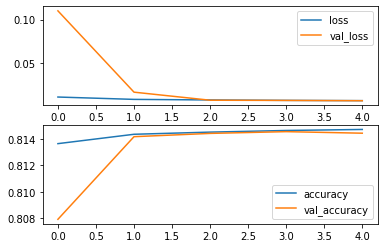

In [15]:
plt.subplot(2,1,1)
plt.plot( history.history['loss'], label = 'loss')
plt.plot( history.history['val_loss'], label = 'val_loss')
plt.legend(loc = 'best')
plt.subplot(2,1,2)
plt.plot( history.history['accuracy'], label = 'accuracy')
plt.plot( history.history['val_accuracy'], label = 'val_accuracy')
plt.legend(loc = 'best')
plt.show()

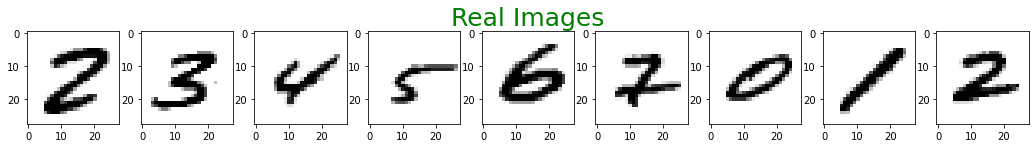

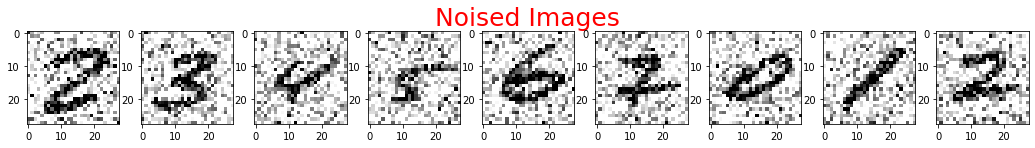

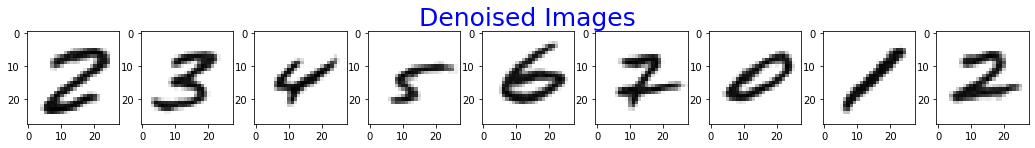

In [16]:
plt.figure(figsize = (18,18))
for i in range(10,19):
    plt.subplot(9,9,i)
    if(i == 14):
        plt.title('Real Images', fontsize = 25, color = 'Green') 
    plt.imshow(test_images[i].reshape(1,28,28)[0], cmap = plt.cm.binary)
plt.show()


plt.figure(figsize = (18,18))
for i in range(10,19):
    if(i == 15):
        plt.title('Noised Images', fontsize = 25, color = 'red') 
    plt.subplot(9,9,i)
    plt.imshow(test_noisy_images[i].reshape(1,28,28)[0], cmap = plt.cm.binary)
plt.show()


plt.figure(figsize = (18,18))
for i in range(10,19):  
    if(i == 15):
        plt.title('Denoised Images', fontsize = 25, color = 'Blue') 
    
    plt.subplot(9,9,i)
    plt.imshow(model.predict(test_noisy_images[i].reshape(1,28,28,1)).reshape(1,28,28)[0], cmap = plt.cm.binary) 
plt.show()

# DIRTY DOCUMENT

## DATASET LOADING

In [3]:
# importing google drive to create the work space
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!chmod 600 /content/kaggle.json

In [18]:
%cd '/content/gdrive/MyDrive/DNN/4_1'

/content/gdrive/MyDrive/DNN/4_1


In [19]:
# Configure Working directory to for Kaggle Json image (important to download the dataset from Kaggle to google drive via colab)
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/DNN/Kaggle"

In [23]:
!kaggle competitions download -c denoising-dirty-documents

 56% 20.0M/35.7M [00:00<00:00, 204MB/s]
100% 35.7M/35.7M [00:00<00:00, 229MB/s]


In [32]:
# Unzip the folders and to delete the .zip file.
!unzip \*.zip

Archive:  sampleSubmission.csv.zip
  inflating: sampleSubmission.csv    

Archive:  test.zip
   creating: test/
  inflating: test/1.png              
 extracting: test/10.png             
  inflating: test/100.png            
 extracting: test/103.png            
  inflating: test/106.png            
 extracting: test/109.png            
  inflating: test/112.png            
 extracting: test/115.png            
 extracting: test/118.png            
  inflating: test/121.png            
  inflating: test/124.png            
  inflating: test/127.png            
 extracting: test/13.png             
  inflating: test/130.png            
 extracting: test/133.png            
  inflating: test/136.png            
 extracting: test/139.png            
 extracting: test/142.png            
 extracting: test/145.png            
  inflating: test/148.png            
 extracting: test/151.png            
  inflating: test/154.png            
 extracting: test/157.png            
 extracting: t

In [33]:
rm *.zip

# Import Libraries

In [1]:
import numpy as np
from keras.layers import Input, Dense,Conv2D,MaxPooling2D,UpSampling2D,BatchNormalization
from keras.models import Model,Sequential
import matplotlib.pyplot as plt
import cv2
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

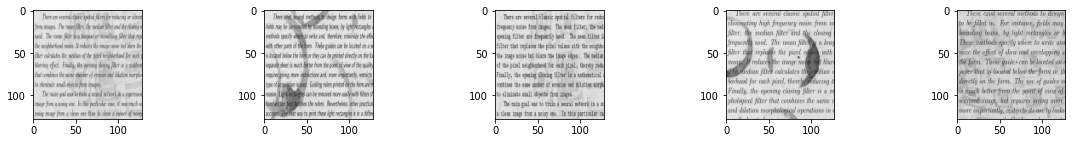

In [5]:
plt.figure(figsize=(20, 2))
for root, dirs, files in os.walk('/content/gdrive/MyDrive/DNN/4_1/train'):
    for i in range(5):
        ax = plt.subplot(1, 5, i+1)
        img = cv2.imread(os.path.join(root,files[i]))
        resized = cv2.resize(img, (128,128), interpolation = cv2.INTER_AREA)
        plt.imshow(resized)
plt.show()

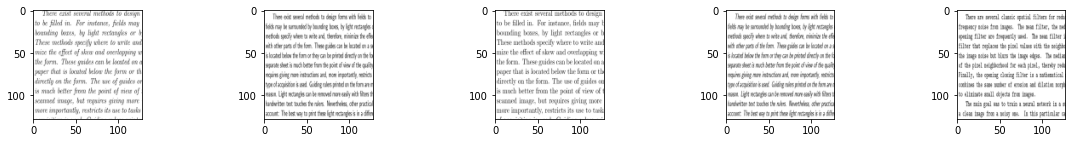

In [6]:
plt.figure(figsize=(20, 2))
for root, dirs, files in os.walk('/content/gdrive/MyDrive/DNN/4_1/train_cleaned'):
    for i in range(5):
        ax = plt.subplot(1, 5, i+1)
        img = cv2.imread(os.path.join(root,files[i]))
        resized = cv2.resize(img, (128,128), interpolation = cv2.INTER_AREA)
        plt.imshow(resized)
plt.show()

In [7]:
# Load train and train_cleaned data
train_data = []
train_data_cleaned = []
train_path = '/content/gdrive/MyDrive/DNN/4_1/train'
train_cleaned_path = '/content/gdrive/MyDrive/DNN/4_1/train_cleaned'



for filename in os.listdir(train_path):
    train_img = cv2.imread(os.path.join(train_path,filename))
    train_img = cv2.cvtColor(train_img, cv2.COLOR_BGR2GRAY)
    train_img = cv2.resize(train_img,(540, 258),interpolation = cv2.INTER_AREA)
    train_img = train_img.astype('float32')
    train_img = train_img/255.0
    train_data.append(train_img)
    train_cleaned_img = cv2.imread(os.path.join(train_cleaned_path,filename))
    train_cleaned_img = cv2.cvtColor(train_cleaned_img, cv2.COLOR_BGR2GRAY)
    train_cleaned_img = cv2.resize(train_cleaned_img,(540, 258),interpolation = cv2.INTER_AREA)
    train_cleaned_img = train_cleaned_img.astype('float32')
    train_cleaned_img = train_cleaned_img/255.0
    train_data_cleaned.append(train_cleaned_img)

In [8]:
# Let's stack the images
train_data = np.stack(train_data)
train_data_cleaned = np.stack(train_data_cleaned)

# Reshaping the data for model
train_data = train_data.reshape(train_data.shape[0],train_data.shape[1],train_data.shape[2],1)
train_data_cleaned = train_data_cleaned.reshape(train_data_cleaned.shape[0],train_data_cleaned.shape[1],train_data_cleaned.shape[2],1)



x_train,x_val,y_train,y_val = train_test_split(train_data,train_data_cleaned,test_size=0.2)

In [9]:
# Define the model
input_img = Input(shape=(258,540,1))
encoder = Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='elu')(input_img)
encoder = MaxPooling2D((2,2))(encoder)
decoder = Conv2D(64,kernel_size=(3,3),padding='same',activation='elu')(encoder)
decoder = UpSampling2D((2,2))(decoder)
decoder = Conv2D(1,kernel_size=(3,3),padding='same',activation='sigmoid')(decoder)
autoencoder = Model(input_img,decoder)
autoencoder.compile(loss='binary_crossentropy',optimizer='adam',metrics=['mse'])

autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 258, 540, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 258, 540, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 129, 270, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 129, 270, 64)      36928     
                                                                 
 up_sampling2d (UpSampling2D  (None, 258, 540, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 258, 540, 1)       577   

In [10]:
early_stopping = EarlyStopping(monitor='val_loss',min_delta=0,patience=5,verbose=1, mode='auto')

In [11]:
history = autoencoder.fit(x_train,y_train,epochs=100,batch_size=20,validation_data=(x_val,y_val),callbacks=[early_stopping])

Epoch 1/100
6/6 [==============================] - 88s 15s/step - loss: 0.5058 - mse: 0.1351 - val_loss: 0.3419 - val_mse: 0.0647
Epoch 2/100
6/6 [==============================] - 82s 14s/step - loss: 0.3558 - mse: 0.0661 - val_loss: 0.3431 - val_mse: 0.0651
Epoch 3/100
6/6 [==============================] - 81s 14s/step - loss: 0.3154 - mse: 0.0593 - val_loss: 0.3031 - val_mse: 0.0536
Epoch 4/100
6/6 [==============================] - 86s 15s/step - loss: 0.3023 - mse: 0.0520 - val_loss: 0.2937 - val_mse: 0.0497
Epoch 5/100
6/6 [==============================] - 80s 13s/step - loss: 0.2812 - mse: 0.0488 - val_loss: 0.2746 - val_mse: 0.0501
Epoch 6/100
6/6 [==============================] - 78s 13s/step - loss: 0.2673 - mse: 0.0486 - val_loss: 0.2574 - val_mse: 0.0449
Epoch 7/100
6/6 [==============================] - 78s 13s/step - loss: 0.2475 - mse: 0.0402 - val_loss: 0.2391 - val_mse: 0.0347
Epoch 8/100
6/6 [==============================] - 78s 13s/step - loss: 0.2301 - mse: 0.03

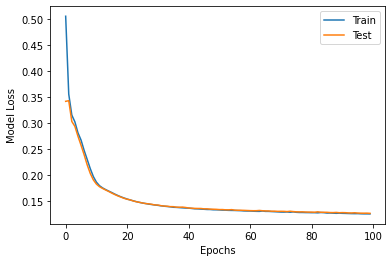

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Model Loss')
plt.legend(['Train', 'Test'])
plt.show()

In [13]:
preds = autoencoder.predict(x_val)


In [14]:
print(preds)

[[[[0.91442966]
   [0.9879389 ]
   [0.97859186]
   ...
   [0.9770708 ]
   [0.9749899 ]
   [0.92593527]]

  [[0.9734156 ]
   [0.99935555]
   [0.9977897 ]
   ...
   [0.9984381 ]
   [0.99876785]
   [0.97619367]]

  [[0.96772873]
   [0.99812925]
   [0.9863821 ]
   ...
   [0.988883  ]
   [0.9955801 ]
   [0.9429513 ]]

  ...

  [[0.96149164]
   [0.9982438 ]
   [0.98993385]
   ...
   [0.3033098 ]
   [0.5273043 ]
   [0.6805269 ]]

  [[0.9622484 ]
   [0.9989214 ]
   [0.9967061 ]
   ...
   [0.95610976]
   [0.9453243 ]
   [0.8007072 ]]

  [[0.87975025]
   [0.97918624]
   [0.96567   ]
   ...
   [0.9432104 ]
   [0.92438436]
   [0.80131304]]]


 [[[0.91442966]
   [0.9879389 ]
   [0.97859186]
   ...
   [0.9778148 ]
   [0.97719073]
   [0.9263239 ]]

  [[0.9734156 ]
   [0.99935555]
   [0.9977897 ]
   ...
   [0.99846864]
   [0.9989873 ]
   [0.9818735 ]]

  [[0.96772873]
   [0.99812925]
   [0.9863821 ]
   ...
   [0.98971546]
   [0.9954674 ]
   [0.95030355]]

  ...

  [[0.96149164]
   [0.9982438 ]
   [0.9

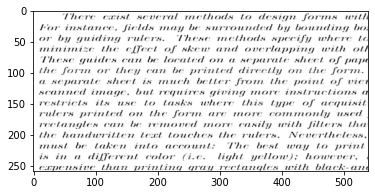

In [15]:
preds_0 = preds[0].reshape(preds.shape[1],preds.shape[2])
x_val_0 = x_val[0].reshape(x_val.shape[1],x_val.shape[2])
plt.imshow(preds_0,cmap='gray')

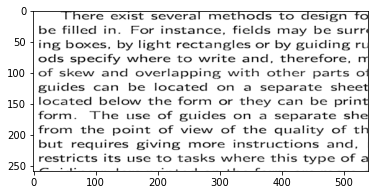

In [16]:
preds_1= preds[1].reshape(preds.shape[1],preds.shape[2])
x_val_1 = x_val[1].reshape(x_val.shape[1],x_val.shape[2])
plt.imshow(preds_1,cmap='gray')

# Load the test data and make predictions

In [18]:
def load_test(path):
    test_data= []
    test_keys= []
    for filename in os.listdir(path):
        test_key = filename.split('.')[0]
        img = cv2.imread(os.path.join(path,filename))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img,(540, 258),interpolation = cv2.INTER_AREA)
        img = img.astype('float32')
        img = img/255.0
        test_data.append(img)
        test_keys.append(test_key)
    return test_data,test_keys

test_path = '/content/gdrive/MyDrive/DNN/4_1/test'
test_data,test_keys = load_test(test_path)
test_data = np.stack(test_data)
test_data = test_data.reshape(test_data.shape[0],test_data.shape[1],test_data.shape[2],1)

In [19]:
test_preds = autoencoder.predict(test_data)

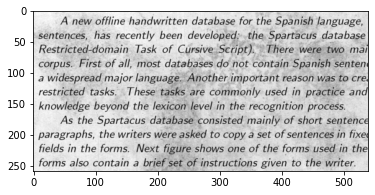

In [20]:
test_preds_1= test_preds[1].reshape(test_preds.shape[1],test_preds.shape[2])
test_data_1 = test_data[1].reshape(test_data.shape[1],test_data.shape[2])
plt.imshow(test_data_1,cmap='gray')

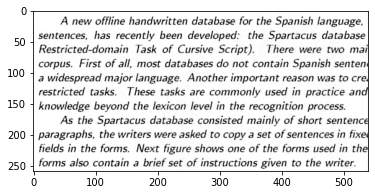

In [21]:
plt.imshow(test_preds_1,cmap='gray')

1. (Reference 1) [https://www.kaggle.com/code/vinayver/denoising-documents-using-autoencoder]

2. (Reference 2) [https://analyticsindiamag.com/hands-on-guide-to-image-denoising-using-encoder-decoder-model/]

3. (Reference 3)[https://www.kaggle.com/competitions/denoising-dirty-documents]